# K_Means Algorithm

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Read Dataset (PKL type)

In [2]:
with open('S5.pkl', 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

In [3]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]
c_az=s2_data['signal']['chest']['ACC'][0:,2]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]
c_emg=s2_data['signal']['chest']['EMG'][:,0]
c_eda=s2_data['signal']['chest']['EDA'][:,0]
c_temp=s2_data['signal']['chest']['Temp'][:,0]
c_resp=s2_data['signal']['chest']['Resp'][:,0]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]
w_label=s2_data['label']

In [4]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T
numpy_data2=np.array([w_ax, w_ay, w_az,w_bvp,w_eda,w_temp,w_label])
numpy_data2=numpy_data2.T

<ipython-input-4-aabd8313c500>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  numpy_data2=np.array([w_ax, w_ay, w_az,w_bvp,w_eda,w_temp,w_label])


# Converting pickle dictionary to Pandas Data frame

In [5]:
df1 = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"]) 
# df1.to_csv('f1')
df1.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.8606,0.0742,0.8570,-0.275803,0.016800,3.888321,34.119934,0.044250,0.0
1,0.8456,0.0780,0.8574,-0.229752,0.014969,3.913116,34.142822,0.032043,0.0
2,0.8410,0.0874,0.7570,-0.195282,0.015335,3.873062,34.135193,0.015259,0.0
3,0.8418,0.0986,0.5782,-0.164474,-0.003708,3.883362,34.136749,-0.062561,0.0
4,0.8554,0.0984,0.3332,-0.134811,0.017624,3.886795,34.118439,0.016785,0.0


# Drop irrelevant features

In [6]:
df1.drop(['c_ax','c_ay','c_az'], axis=1, inplace=True)
df1

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,-0.275803,0.016800,3.888321,34.119934,0.044250,0.0
1,-0.229752,0.014969,3.913116,34.142822,0.032043,0.0
2,-0.195282,0.015335,3.873062,34.135193,0.015259,0.0
3,-0.164474,-0.003708,3.883362,34.136749,-0.062561,0.0
4,-0.134811,0.017624,3.886795,34.118439,0.016785,0.0
...,...,...,...,...,...,...
4380595,-0.008240,0.009293,10.231400,34.971069,7.070923,0.0
4380596,-0.000778,-0.004074,10.231018,34.900116,7.044983,0.0
4380597,0.014877,-0.013687,10.231018,34.949463,7.057190,0.0
4380598,0.029251,-0.001007,10.230637,34.971069,7.090759,0.0


In [7]:
#data shape
print("shape",df1.shape)
print(len(df1))
print("w_label",len(w_label))

shape (4380600, 6)
4380600
w_label 4380600


## Visualizing dataset labels comparision

baseline_indices 838600
stress_indices 451500
amusement_indices 261800
meditation_indices 555800
others_indices 2142700


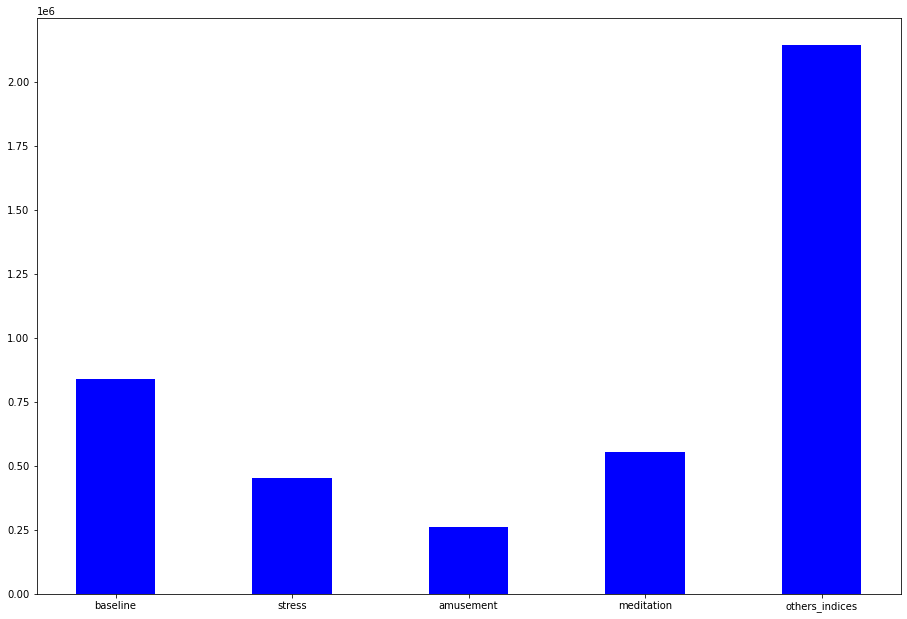

In [8]:
baseline_indices = np.nonzero(s2_data['label']==1)[0]
stress_indices = np.nonzero(s2_data['label']==2)[0]
amusement_indices = np.nonzero(s2_data['label']==3)[0]
meditation_indices = np.nonzero(s2_data['label']==4)[0]
others_indices = np.nonzero(s2_data['label']==0)[0]


print("baseline_indices", len(baseline_indices))
print("stress_indices", len(stress_indices))
print("amusement_indices", len(amusement_indices))
print("meditation_indices", len(meditation_indices))
print("others_indices", len(others_indices))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["baseline", "stress", "amusement","meditation", "others_indices"]
y_ax = [len(baseline_indices),len(stress_indices),len(amusement_indices),len(meditation_indices),len(others_indices)]
ax.bar(langs,y_ax,color = 'b', width = 0.45)
fig.savefig('f1.png')
plt.show()

## Data Shapes from Wrist and Chist sensors

c_ax 4380600
c_ay 4380600
c_az 4380600
c_ecg 4380600
c_emg 4380600
c_eda 4380600
c_temp 4380600
c_resp 4380600
w_ax 200256
w_ay 200256
w_az 200256
w_bvp 400512
w_eda 25032
w_temp 25032
[0 0 0 ... 0 0 0] 4380600
Min label value 0 Max label value 7


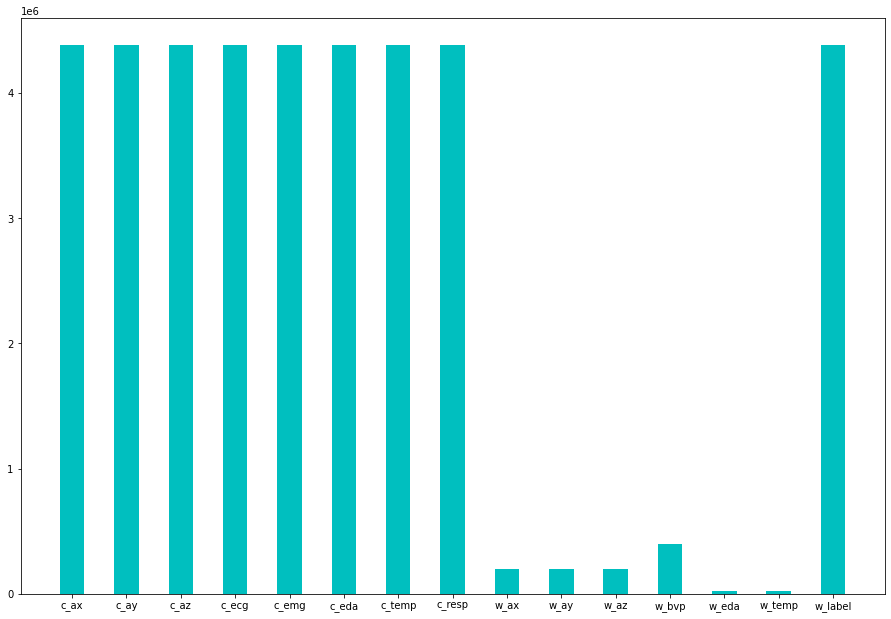

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline
print("c_ax",len(c_ax))
print("c_ay",len(c_ay))
print("c_az",len(c_az))
print("c_ecg",len(c_ecg))
print("c_emg",len(c_emg))
print("c_eda",len(c_eda))
print("c_temp",len(c_temp))
print("c_resp",len(c_resp))
print("w_ax",len(w_ax))
print("w_ay",len(w_ay))
print("w_az",len(w_az))
print("w_bvp",len(w_bvp))
print("w_eda",len(w_eda))
print("w_temp",len(w_temp))
print(w_label, len(w_label))
print("Min label value", min(w_label), "Max label value",max(w_label))

fig = plt.figure()
ax = fig.add_axes([1,1,2,2])
langs = ["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp","w_label"]
y_ax = [len(c_ax),len(c_ay),len(c_az),len(c_ecg),len(c_emg),len(c_eda),len(c_temp),len(c_resp),len(w_ax),len(w_ay),len(w_az),len(w_bvp),len(w_eda),len(w_temp),len(w_label)]
ax.bar(langs,y_ax,color = 'c', width = 0.45)

plt.show()
plt.savefig('f2.png',dpi=100)
#Since data samples from chest device are 21 times more than data samples of wrist device, thus data set is unbalanced,
#and data from wrsit sensor should be excluded. Chest device gives 4255300 samples per sensor, whereas wrist device gives only 194528 samples. 

## Data Distribution for Chest sensor

array([[<AxesSubplot:title={'center':'c_ecg'}>,
        <AxesSubplot:title={'center':'c_emg'}>],
       [<AxesSubplot:title={'center':'c_eda'}>,
        <AxesSubplot:title={'center':'c_temp'}>],
       [<AxesSubplot:title={'center':'c_resp'}>,
        <AxesSubplot:title={'center':'w_label'}>]], dtype=object)

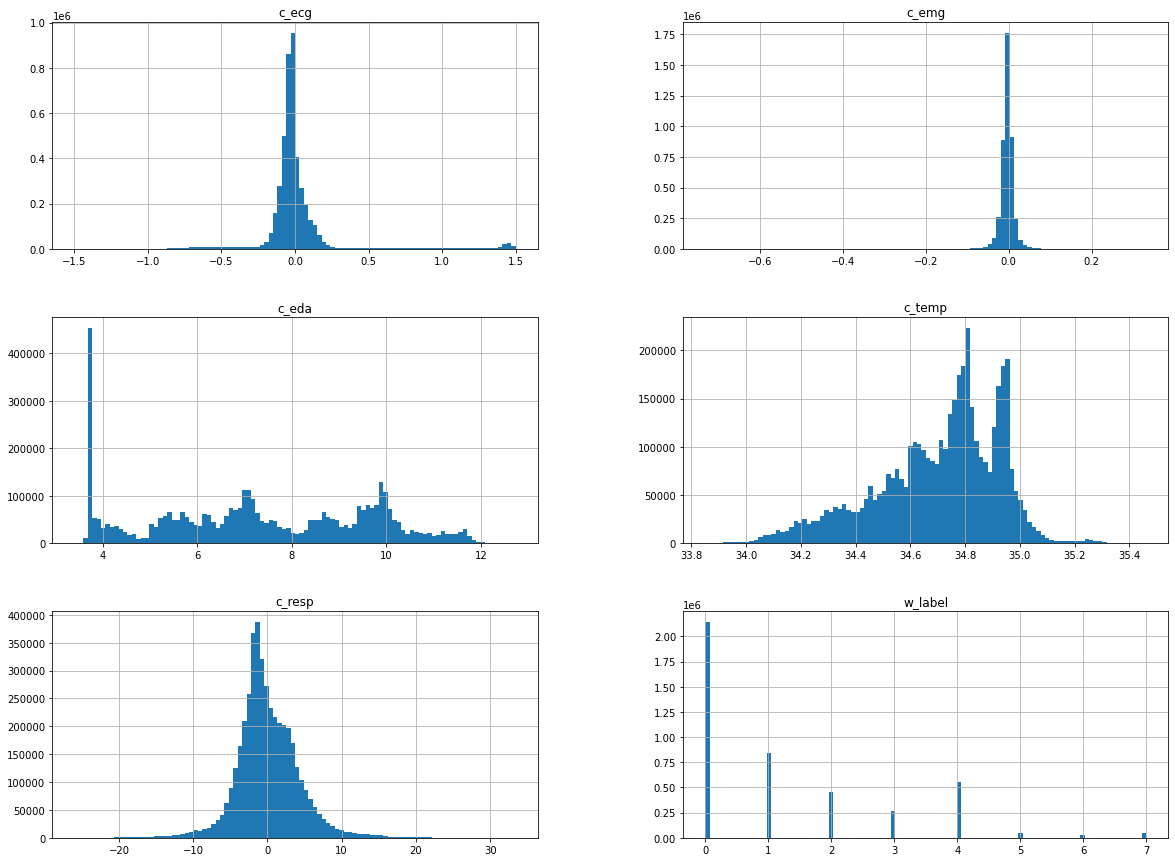

In [10]:
df1.hist(bins=100, figsize = (20,15))

## Other way to see outliers within the feature

<AxesSubplot:>

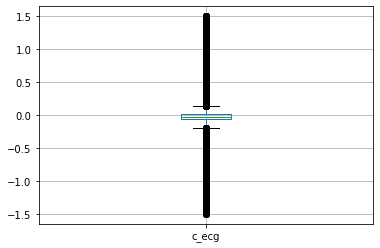

In [11]:
import seaborn as sns
# sns.boxplot(df1['c_ecg'])
df1.boxplot(column=['c_ecg'])

## Calculating IQR and Outliers

In [12]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
print((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)) )
print(df1.shape)

IQR is
 c_ecg      0.082535
c_emg      0.013916
c_eda      3.987122
c_temp     0.304352
c_resp     4.679871
w_label    2.000000
dtype: float64
         c_ecg  c_emg  c_eda  c_temp  c_resp  w_label
0         True  False  False   False   False    False
1         True  False  False   False   False    False
2         True  False  False   False   False    False
3        False  False  False   False   False    False
4        False  False  False   False   False    False
...        ...    ...    ...     ...     ...      ...
4380595  False  False  False   False   False    False
4380596  False  False  False   False   False    False
4380597  False  False  False   False   False    False
4380598  False  False  False   False   False    False
4380599  False  False  False   False   False    False

[4380600 rows x 6 columns]
(4380600, 6)


## Removing Outliers

In [13]:
df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(3433167, 6)


In [14]:
df_out

,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
3,-0.164474,-0.003708,3.883362,34.136749,-0.062561,0.0
4,-0.134811,0.017624,3.886795,34.118439,0.016785,0.0
6,-0.080841,0.016617,3.873444,34.129089,-0.001526,0.0
8,-0.052414,-0.001053,3.895569,34.151978,0.016785,0.0
9,-0.038864,0.003342,3.873444,34.118439,-0.015259,0.0
...,...,...,...,...,...,...
4380595,-0.008240,0.009293,10.231400,34.971069,7.070923,0.0
4380596,-0.000778,-0.004074,10.231018,34.900116,7.044983,0.0
4380597,0.014877,-0.013687,10.231018,34.949463,7.057190,0.0
4380598,0.029251,-0.001007,10.230637,34.971069,7.090759,0.0


<AxesSubplot:>

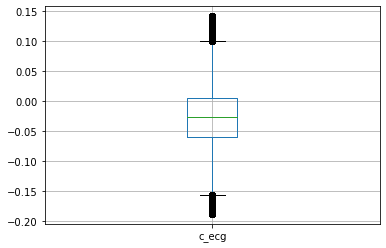

In [15]:
df_out.boxplot(column=['c_ecg'])

## Distribution of the Data after removing the outliers

array([[<AxesSubplot:title={'center':'c_ecg'}>,
        <AxesSubplot:title={'center':'c_emg'}>],
       [<AxesSubplot:title={'center':'c_eda'}>,
        <AxesSubplot:title={'center':'c_temp'}>],
       [<AxesSubplot:title={'center':'c_resp'}>,
        <AxesSubplot:title={'center':'w_label'}>]], dtype=object)

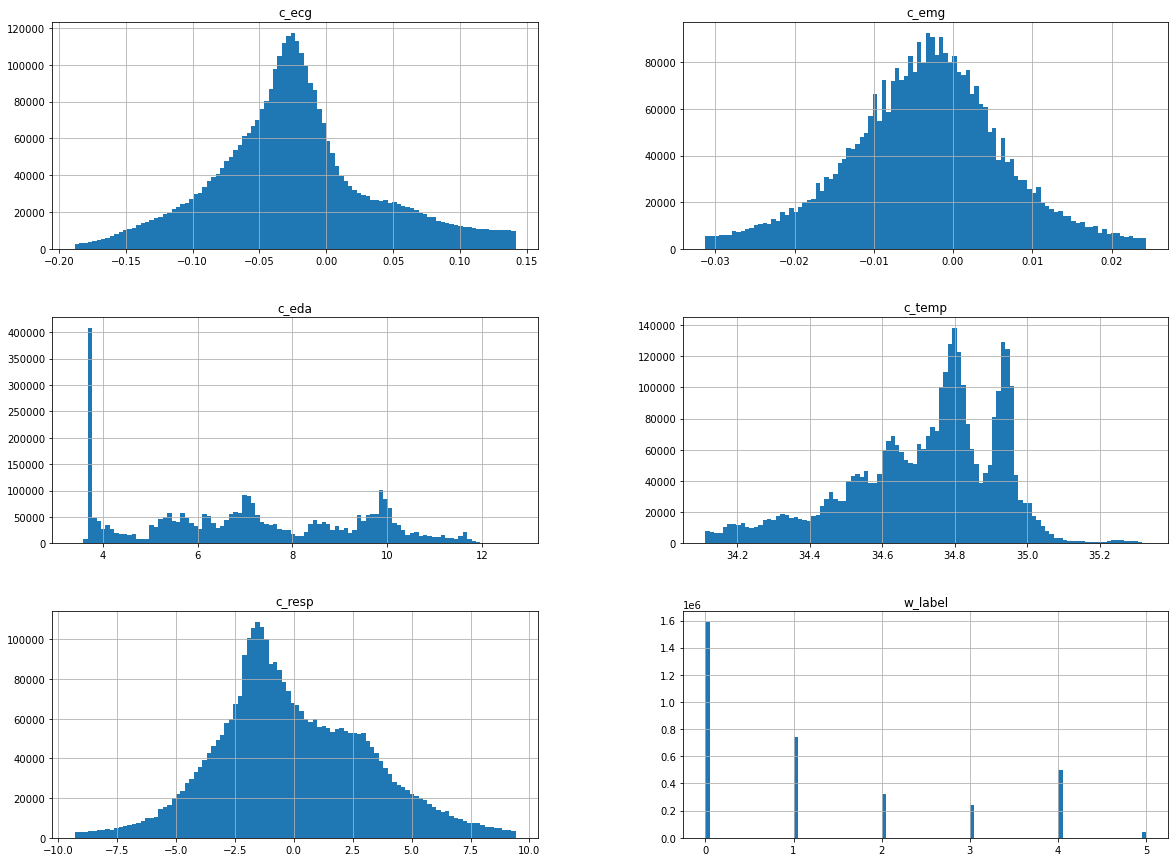

In [16]:
df_out.hist(bins=100, figsize = (20,15))

In [17]:
# (df_out.describe())

In [18]:
def converter(w_label):
    if w_label==0:
        return 'transient'
    elif w_label==1:
        return 'baseline'
    elif w_label==2:
        return 'stress'
    elif w_label==3:
        return 'amusement'
    elif w_label==4:
        return 'meditation'   
    else:
        return 'ignored'

df1['Labels'] = df1['w_label'].apply(converter)
cols = df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
Labeled_Data = df1[cols]
Labeled_Data.drop(['w_label'], axis=1, inplace=True)
Labeled_Data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
0,transient,-0.275803,0.016800,3.888321,34.119934,0.044250
1,transient,-0.229752,0.014969,3.913116,34.142822,0.032043
2,transient,-0.195282,0.015335,3.873062,34.135193,0.015259
3,transient,-0.164474,-0.003708,3.883362,34.136749,-0.062561
4,transient,-0.134811,0.017624,3.886795,34.118439,0.016785
...,...,...,...,...,...,...
4380595,transient,-0.008240,0.009293,10.231400,34.971069,7.070923
4380596,transient,-0.000778,-0.004074,10.231018,34.900116,7.044983
4380597,transient,0.014877,-0.013687,10.231018,34.949463,7.057190
4380598,transient,0.029251,-0.001007,10.230637,34.971069,7.090759


## Deleting rows for meditation, transient and ignored

In [19]:
filter1 = Labeled_Data['Labels'] == 'meditation'
Labeled_Data.drop(index=Labeled_Data[filter1].index, inplace = True)
filter2 = Labeled_Data['Labels'] == 'ignored'
Labeled_Data.drop(index=Labeled_Data[filter2].index, inplace = True)
filter3 = Labeled_Data['Labels'] == 'transient'
Labeled_Data.drop(index=Labeled_Data[filter3].index, inplace = True)
Labeled_Data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
195560,baseline,-0.028976,-0.007828,6.387711,34.251160,2.789307
195561,baseline,-0.029114,-0.003296,6.384277,34.252716,2.891541
195562,baseline,-0.030212,-0.005264,6.398392,34.249634,2.861023
195563,baseline,-0.030991,-0.003159,6.392288,34.298553,2.833557
195564,baseline,-0.031906,-0.001968,6.385803,34.326050,2.857971
...,...,...,...,...,...,...
2973155,stress,0.158249,0.001602,9.645081,34.592560,-7.603455
2973156,stress,0.137375,0.002792,9.645081,34.571075,-7.591248
2973157,stress,0.113342,0.001740,9.645844,34.595642,-7.591248
2973158,stress,0.088486,-0.004898,9.645844,34.577209,-7.566833


In [20]:
# Labeled_Data.to_csv('fx')

## Data Segmentation (Sliding Window)

In [20]:
#sliding window and feature extraction

X=Labeled_Data.iloc[:,1:]
X_mean=X.rolling(60).mean()
X_std=X.rolling(60).std()
Labeled_Data.head()

,Labels,c_ecg,c_emg,c_eda,c_temp,c_resp
195560,baseline,-0.028976,-0.007828,6.387711,34.251160,2.789307
195561,baseline,-0.029114,-0.003296,6.384277,34.252716,2.891541
195562,baseline,-0.030212,-0.005264,6.398392,34.249634,2.861023
195563,baseline,-0.030991,-0.003159,6.392288,34.298553,2.833557
195564,baseline,-0.031906,-0.001968,6.385803,34.326050,2.857971


## Feature Extraction

In [21]:
FeaturesDF=pd.concat([Labeled_Data.iloc[:,:1],X_mean,X_std],keys=['','Mean','SD'], axis=1)
FeaturesDF=FeaturesDF[59::30]
Label=FeaturesDF[('','Labels')]
X_new=FeaturesDF[[('Mean','c_ecg'),('SD','c_ecg'),('Mean','c_emg'),('SD','c_emg'),('Mean','c_eda'),('SD','c_eda'),('Mean','c_temp'),('SD','c_temp'),('Mean','c_resp'),('SD','c_resp')]]
pd.DataFrame(FeaturesDF.value_counts())

FeaturesDF

Mean                                           \
           Labels     c_ecg     c_emg     c_eda     c_temp    c_resp   
195619   baseline -0.027024 -0.003218  6.388919  34.303582  2.700272   
195649   baseline -0.023534 -0.003931  6.387952  34.307532  2.521617   
195679   baseline -0.016402 -0.003580  6.387107  34.309391  2.371674   
195709   baseline -0.008920 -0.003699  6.389033  34.304063  2.262014   
195739   baseline -0.004292 -0.002934  6.388620  34.305512  2.130712   
...           ...       ...       ...       ...        ...       ...   
2973039    stress  0.038158 -0.003989  9.712906  34.567273 -8.191961   
2973069    stress  0.045392 -0.003375  9.699841  34.571001 -8.113174   
2973099    stress  0.026302 -0.003867  9.686960  34.576087 -8.013713   
2973129    stress  0.042109 -0.003963  9.673011  34.574633 -7.891617   
2973159    stress  0.129523 -0.003361  9.657459  34.574915 -7.739944   

               SD                                          
            c_ecg     c_emg     c_eda    c_temp    c_resp  
195619   0.002090  0.009186  0.004977  0.027934  0.095312  
195649   0.003374  0.009201  0.005119  0.028906  0.159922  
195679   0.005158  0.008784  0.004710  0.029605  0.139286  
195709   0.003464  0.009975  0.016197  0.027818  0.078954  
195739   0.002624  0.010101  0.016235  0.025340  0.111984  
...           ...       ...       ...       ...       ...  
2973039  0.022726  0.007219  0.008277  0.029617  0.042037  
2973069  0.013353  0.012599  0.007354  0.026707  0.054113  
2973099  0.013665  0.012488  0.008018  0.022012  0.065593  
2973129  0.038115  0.006558  0.008379  0.023415  0.085728  
2973159  0.076712  0.007398  0.009616  0.023273  0.102383  

[51729 rows x 11 columns]

In [23]:
# FeaturesDF.to_csv('f55')

## Feature Normalization

In [22]:
from sklearn.preprocessing import normalize
X=FeaturesDF.iloc[:,[1,2,3,4,5,6,7,8,9,10]]  #independent variable X
y=FeaturesDF.iloc[:,0] #dependent variable y

X=normalize(X)
norm_df = pd.DataFrame(X)
norm_df

,0,1,2,3,4,5,6,7,8,9
0,-0.000772,-0.000092,0.182551,0.980160,0.077155,0.000060,0.000262,0.000142,0.000798,0.002723
1,-0.000673,-0.000112,0.182573,0.980536,0.072070,0.000096,0.000263,0.000146,0.000826,0.004571
2,-0.000469,-0.000102,0.182595,0.980839,0.067802,0.000147,0.000251,0.000135,0.000846,0.003982
3,-0.000255,-0.000106,0.182714,0.981032,0.064689,0.000099,0.000285,0.000463,0.000796,0.002258
4,-0.000123,-0.000084,0.182738,0.981265,0.060946,0.000075,0.000289,0.000464,0.000725,0.003203
...,...,...,...,...,...,...,...,...,...,...
51724,0.001036,-0.000108,0.263732,0.938597,-0.222434,0.000617,0.000196,0.000225,0.000804,0.001141
51725,0.001233,-0.000092,0.263502,0.939141,-0.220399,0.000363,0.000342,0.000200,0.000726,0.001470
51726,0.000715,-0.000105,0.263298,0.939801,-0.217818,0.000371,0.000339,0.000218,0.000598,0.001783
51727,0.001146,-0.000108,0.263143,0.940563,-0.214682,0.001037,0.000178,0.000228,0.000637,0.002332


## Split the Data into Training and Testing Sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=45, shuffle=True)

## Applying k-means algorithm

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=3, max_iter=100, random_state=45)
y_kmeans=kmeans.fit_predict(X_train)

In [25]:
LCDF = pd.DataFrame({'Clusters': y_kmeans, 'Given Labels': y_train})
ClustersDataDF = pd.DataFrame({'Clusters': y_kmeans, 'mean c_ecg': X_train[:,0], 'mean c_emg': X_train[:,1], 
                               'mean c_eda': X_train[:,2], 'mean c_temp': X_train[:,3], 'mean c_resp': X_train[:,4],
                               'std c_ecg': X_train[:,5], 'std c_emg': X_train[:,6], 'std c_eda': X_train[:,7],
                               'std c_temp': X_train[:,8], 'std c_resp': X_train[:,9]})


LCDF = pd.DataFrame({'Clusters': y_kmeans, 'Given Labels': y_train})
LCDF

,Clusters,Given Labels
2753259,0,stress
737209,1,baseline
559969,1,baseline
1493009,1,amusement
676459,1,baseline
...,...,...
1439189,1,amusement
685129,1,baseline
582469,1,baseline
375979,0,baseline


In [26]:
#crosstab matrix (pivot table)

ctMatrix = pd.crosstab(LCDF['Clusters'], LCDF['Given Labels'], margins=True, margins_name='All')
ctMatrix

Given Labels,amusement,baseline,stress,All
Clusters,,,,
0,306,397,6301,7004
1,4647,15737,60,20444
2,251,571,2767,3589
All,5204,16705,9128,31037


In [27]:
#converting the clusters numbers we get into names

def convr(label):
    if label==0:
        return 'baseline'
    elif label==1:
        return 'amusement'
    elif label==2:
        return 'stress'
    
LCDF['N2L'] = LCDF['Clusters'].apply(convr)
LCDF['N2L']

2753259     baseline
737209     amusement
559969     amusement
1493009    amusement
676459     amusement
             ...    
1439189    amusement
685129     amusement
582469     amusement
375979      baseline
392359     amusement
Name: N2L, Length: 31037, dtype: object

In [28]:
#getting Clustering report, Confusion Matrix, and Accuracy Score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(LCDF['N2L'], LCDF['Given Labels']))
print(confusion_matrix(LCDF['N2L'], LCDF['Given Labels']))
accuracy_score(LCDF['N2L'], LCDF['Given Labels'])

              precision    recall  f1-score   support

   amusement       0.89      0.23      0.36     20444
    baseline       0.02      0.06      0.03      7004
      stress       0.30      0.77      0.44      3589

    accuracy                           0.25     31037
   macro avg       0.41      0.35      0.28     31037
weighted avg       0.63      0.25      0.30     31037

[[ 4647 15737    60]
 [  306   397  6301]
 [  251   571  2767]]


0.25166736475819185

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = kmeans, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))

Accuracy: -6865.78 %
Standard Deviation: 94.91 %
-68.66 accuracy with a standard deviation of 0.95
